In [1]:
import sys
sys.path.append('../')

In [3]:
### Libraries
from pipelines.experimental_modeling_pipeline import DiabetesPreprocessing as DP
from pipelines.experimental_modeling_pipeline import AsthmaPreprocessing as AP
from pipelines.experimental_modeling_pipeline import ClusteringAnalysis as QA
from pipelines.experimental_modeling_pipeline import Experimental_modeling_pipeline as EMP
from pipelines.experimental_modeling_pipeline import CopdPreprocessing as COPDP
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

dp = DP("C:/Users/keimp/")
ap = AP("C:/Users/keimp/")
copdp = COPDP("C:/Users/keimp/")
emp = EMP()

## Labeling
Definition:
If your BMI is less than 18.5, it falls within the underweight range.
If your BMI is 18.5 to <25, it falls within the healthy weight rang
.
If your BMI is 25.0 to <30, it falls within the overweight rag
e.
If your BMI is 30.0 or higher, it falls within the obesity ge. ran


Class 1: BMI of 30 to < 35

Class 2: BMI of 35 to<
 4
0
Class 3: BMI of 40 or higher. Class 3 obesity is sometimes categorized as “severe” obesity.ge.

In [4]:
wd = "C:/Users/keimp/"
df = pd.read_csv(wd+"NHS/Data_files/Grouped_files/replace/Body_measures.csv")

In [15]:
def obesity_binary(i):
    if str(i) == "nan":
        return pd.np.nan
    if i >= 30:
        return 1
    return 0

def obesity_overweight_tertiary(i):
    if str(i) == "nan":
        return pd.np.nan
    if i >= 30:
        return 2
    if i >= 25:
        return 1
    return 0

In [16]:
df["obesity_binary"] = df['Body mass index (BMI) | Instance 0'].apply(obesity_binary, 1)
df["obesity_tertiary"] = df['Body mass index (BMI) | Instance 0'].apply(obesity_overweight_tertiary, 1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_24244\166805838.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan
C:\Users\keimp\AppData\Local\Temp\ipykernel_24244\166805838.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [17]:
print(df["obesity_binary"].value_counts())
print(df["obesity_tertiary"].value_counts())

0.0    377037
1.0    122222
Name: obesity_binary, dtype: int64
1.0    212061
0.0    164976
2.0    122222
Name: obesity_tertiary, dtype: int64


In [18]:
df["obesity_binary_sec"] = df['Body mass index (BMI) | Instance 1'].apply(obesity_binary, 1)
df["obesity_tertiary_sec"] = df['Body mass index (BMI) | Instance 1'].apply(obesity_overweight_tertiary, 1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_24244\166805838.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan
C:\Users\keimp\AppData\Local\Temp\ipykernel_24244\166805838.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [20]:
print(df["obesity_binary_sec"].value_counts())
print(df["obesity_tertiary_sec"].value_counts())

0.0    16109
1.0     4188
Name: obesity_binary_sec, dtype: int64
1.0    8596
0.0    7513
2.0    4188
Name: obesity_tertiary_sec, dtype: int64


In [25]:
df[(df["obesity_binary"] == 0) & (df["obesity_binary_sec"] == 1)].shape

(822, 57)

In [26]:
df[(df["obesity_binary"] == 0) & (df["obesity_binary_sec"] == 0)].shape

(15362, 57)

In [27]:
df[(df["obesity_tertiary"] == 1) & (df["obesity_binary_sec"] == 1)].shape

(814, 57)

## Baseline model

In [28]:
datacolumns_selected = [
                        'Waist circumference | Instance 0',
                        'Weight | Instance 0',
                        'Body mass index (BMI) | Instance 0',
                        'Hip circumference | Instance 0',
                        'Standing height | Instance 0',
                        'Basal metabolic rate | Instance 0',
                        'Whole body fat mass | Instance 0'
                       ]
datacolumns_selected_lab = [
                        'Waist circumference | Instance 0',
                        'Weight | Instance 0',
                        'Body mass index (BMI) | Instance 0',
                        'Hip circumference | Instance 0',
                        'Standing height | Instance 0',
                        'Basal metabolic rate | Instance 0',
                        'Whole body fat mass | Instance 0',
                        "obesity_binary_sec",
                       "obesity_binary"
                       ]

### Non-obese to obesity

In [30]:
cohort = pd.concat([df[(df["obesity_binary"] == 0) & (df["obesity_binary_sec"] == 1)],
                    df[(df["obesity_binary"] == 0) & (df["obesity_binary_sec"] == 0)].sample(822)])
cohort = cohort[datacolumns_selected_lab]

Number of missing values: 
 Waist circumference | Instance 0       0
Weight | Instance 0                    0
Body mass index (BMI) | Instance 0     0
Hip circumference | Instance 0         0
Standing height | Instance 0           0
Basal metabolic rate | Instance 0     32
Whole body fat mass | Instance 0      33
obesity_binary_sec                     0
obesity_binary                         0
dtype: int64
Dataframe dimensions:  (1611, 9)


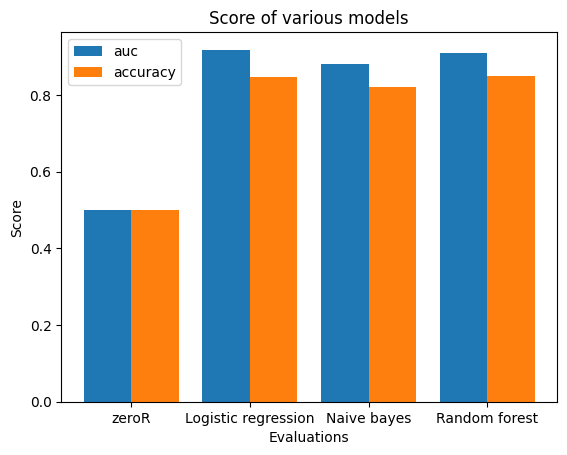

F1:  0.8547511657101635 0.8350269938233132 0.8557806039700359
auc:  [0.500310366232154, 0.9184812257186008, 0.8817365299406887, 0.9086951758929435]
accuracy:  [0.500310366232154, 0.8485433532680807, 0.8218506624617811, 0.8510259023517874]


In [31]:
emp.pipeline(cohort, "obesity_binary_sec", datacolumns_selected,0.25, splits=5)

### Oveweight to obesity

In [32]:
cohort = pd.concat([df[(df["obesity_tertiary"] == 1) & (df["obesity_binary_sec"] == 1)],
                    df[(df["obesity_tertiary"] == 1) & (df["obesity_binary_sec"] == 0)].sample(814)])
cohort = cohort[datacolumns_selected_lab]

Number of missing values: 
 Waist circumference | Instance 0       0
Weight | Instance 0                    0
Body mass index (BMI) | Instance 0     0
Hip circumference | Instance 0         0
Standing height | Instance 0           0
Basal metabolic rate | Instance 0     31
Whole body fat mass | Instance 0      31
obesity_binary_sec                     0
obesity_binary                         0
dtype: int64
Dataframe dimensions:  (1597, 9)


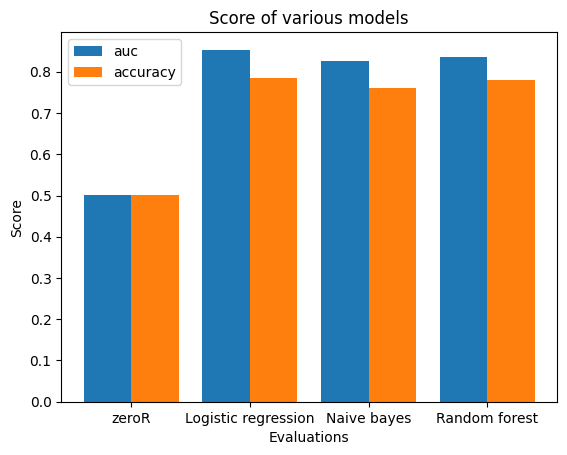

F1:  0.7915048227943856 0.7706163836926658 0.7857222658818064
auc:  [0.5009392611145899, 0.8534997051886792, 0.8263555915880503, 0.8366868366745283]
accuracy:  [0.5009392611145899, 0.7852292319749216, 0.7601841692789969, 0.7802390282131662]


In [33]:
emp.pipeline(cohort, "obesity_binary_sec", datacolumns_selected,0.25, splits=5)

#### Four classes

In [35]:
def four_class_bmi(i):
    if str(i) == "nan":
        return pd.np.nan
    if i >= 30:
        return 3
    if i >= 25:
        return 2
    if i >= 18.5:
        return 1
    return 0

In [36]:
df["bmi_class_four"] = df['Body mass index (BMI) | Instance 0'].apply(four_class_bmi, 1)
df["bmi_class_four_sec"] = df['Body mass index (BMI) | Instance 1'].apply(four_class_bmi, 1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_24244\1116326326.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [37]:
print(df["bmi_class_four"].value_counts())
print(df["bmi_class_four_sec"].value_counts())

2.0    212061
1.0    162350
3.0    122222
0.0      2626
Name: bmi_class_four, dtype: int64
2.0    8596
1.0    7392
3.0    4188
0.0     121
Name: bmi_class_four_sec, dtype: int64


Percentages:
0: 0.5% -> 0.6%
1: 33% -> 36%
2: 43% -> 42%
3: 25% -> 20.6

Underweight has to little data

### Adding different data

In [39]:
df = df.merge(pd.read_csv(wd+"NHS/Data_files/Grouped_files/replace/Physical_activity.csv"), on="Participant ID")
df = df.merge(pd.read_csv(wd+"NHS/Data_files/Grouped_files/replace/Demographics.csv"), on="Participant ID")
df = df.merge(pd.read_csv(wd+"NHS/Data_files/Grouped_files/replace/Blood_biomarkers.csv"), on="Participant ID")
df = df.merge(pd.read_csv(wd+"NHS/Data_files/Grouped_files/replace/Sleep.csv"), on="Participant ID")
df = df.merge(pd.read_csv(wd+"NHS/Data_files/Grouped_files/replace/Depression.csv"), on="Participant ID")

C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (12,24,37,42,75) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [87]:
t = [
                        'Waist circumference | Instance 0',
                        'Weight | Instance 0',
                        'Body mass index (BMI) | Instance 0',
                        'Hip circumference | Instance 0',
                        'Standing height | Instance 0',
                        'Basal metabolic rate | Instance 0',
                        'Whole body fat mass | Instance 0',
                        'Sleep duration | Instance 0',
                        'MET minutes per week for moderate activity | Instance 0',
                         'MET minutes per week for vigorous activity | Instance 0',
                         'MET minutes per week for walking | Instance 0',
                         'Summed MET minutes per week for all activity | Instance 0',
                         'Summed days activity | Instance 0',
                         'Summed minutes activity | Instance 0',
                        'Sex',
                        'Glycated haemoglobin (HbA1c) | Instance 0',
                        'Cholesterol | Instance 0',
                        "bmi_class_four_sec",
                        "bmi_class_four"
                       ]

In [94]:
tt = [
                        'Waist circumference | Instance 0',
                        'Weight | Instance 0',
                        'Body mass index (BMI) | Instance 0',
                        'Hip circumference | Instance 0',
                        'Standing height | Instance 0',
                        'Basal metabolic rate | Instance 0',
                        'Whole body fat mass | Instance 0',
                        'Sleep duration | Instance 0',
                        'MET minutes per week for moderate activity | Instance 0',
                         'MET minutes per week for vigorous activity | Instance 0',
                         'MET minutes per week for walking | Instance 0',
                         'Summed MET minutes per week for all activity | Instance 0',
                         'Summed days activity | Instance 0',
                         'Summed minutes activity | Instance 0',
                        'Sex',
                        'Glycated haemoglobin (HbA1c) | Instance 0',
                        'Cholesterol | Instance 0',
                    
                       ]

In [88]:
tcohort = df[t]

In [89]:
tcohort = tcohort.replace("Prefer not to answer", pd.np.nan)
tcohort = tcohort.replace("Do not know", pd.np.nan)

C:\Users\keimp\AppData\Local\Temp\ipykernel_24244\311919752.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tcohort = tcohort.replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_24244\311919752.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tcohort = tcohort.replace("Do not know", pd.np.nan)


In [90]:
#Data prep
tcohort["Sex"] = tcohort[["Sex"]].apply(dp.sex_to_binary, axis=1)

### Modeling

#### Healthy to overweight

In [93]:
cohort = pd.concat([tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 2)],
                    tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 1)].sample(
                        tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 2)].shape[0])])
cohort = cohort[t]

Number of missing values: 
 Waist circumference | Instance 0                               0
Weight | Instance 0                                            0
Body mass index (BMI) | Instance 0                             0
Hip circumference | Instance 0                                 0
Standing height | Instance 0                                   0
Basal metabolic rate | Instance 0                             45
Whole body fat mass | Instance 0                              47
Sleep duration | Instance 0                                   10
MET minutes per week for moderate activity | Instance 0      432
MET minutes per week for vigorous activity | Instance 0      432
MET minutes per week for walking | Instance 0                432
Summed MET minutes per week for all activity | Instance 0    432
Summed days activity | Instance 0                            379
Summed minutes activity | Instance 0                         432
Sex                                                           

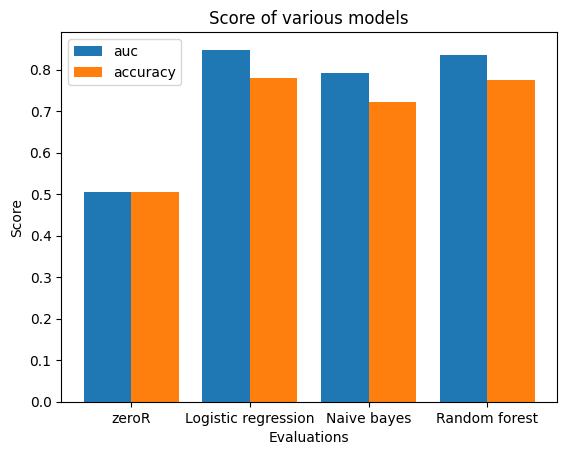

F1:  0.7698973111551675 0.7097357709317726 0.7687840424109249
auc:  [0.5052631578947369, 0.8481007075118789, 0.7909442149751975, 0.83531713810598]
accuracy:  [0.5052631578947369, 0.7808049535603715, 0.7226006191950464, 0.7752321981424148]


In [95]:
emp.pipeline(cohort, "bmi_class_four_sec", tt,0.25, splits=5)

#### Overweight to obesity

In [104]:
cohort = pd.concat([tcohort[(tcohort["bmi_class_four"] == 2) & (tcohort["bmi_class_four_sec"] == 3)],
                    tcohort[(tcohort["bmi_class_four"] == 2) & (tcohort["bmi_class_four_sec"] == 2)].sample(
                        tcohort[(tcohort["bmi_class_four"] == 2) & (tcohort["bmi_class_four_sec"] == 3)].shape[0])])
cohort = cohort[t]

Number of missing values: 
 Waist circumference | Instance 0                               0
Weight | Instance 0                                            0
Body mass index (BMI) | Instance 0                             0
Hip circumference | Instance 0                                 0
Standing height | Instance 0                                   0
Basal metabolic rate | Instance 0                             31
Whole body fat mass | Instance 0                              31
Sleep duration | Instance 0                                    7
MET minutes per week for moderate activity | Instance 0      281
MET minutes per week for vigorous activity | Instance 0      281
MET minutes per week for walking | Instance 0                281
Summed MET minutes per week for all activity | Instance 0    281
Summed days activity | Instance 0                            244
Summed minutes activity | Instance 0                         281
Sex                                                           

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py", line 1238, in f1_score
    return fbeta_score(
  File "c:\users\keimp\appdata\lo

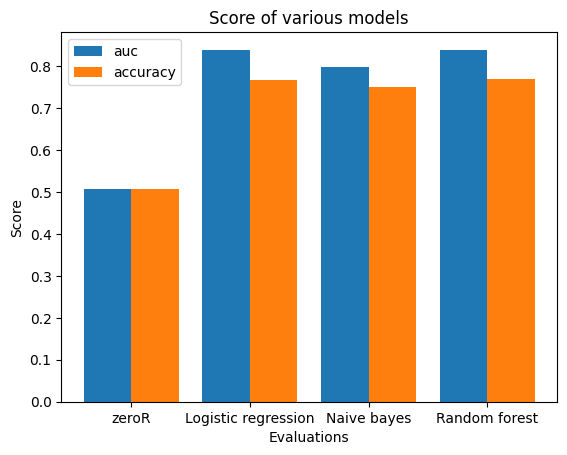

F1:  nan nan nan
auc:  [0.5080440304826418, 0.8393687985067295, 0.7978858434030848, 0.8384329256312014]
accuracy:  [0.5080440304826418, 0.7662804834441822, 0.7493670886075949, 0.7705571050561396]


In [105]:
emp.pipeline(cohort, "bmi_class_four_sec", tt,0.25, splits=5)

#### Overweight to healthy

In [100]:
cohort = pd.concat([tcohort[(tcohort["bmi_class_four"] == 2) & (tcohort["bmi_class_four_sec"] ==1)],
                    tcohort[(tcohort["bmi_class_four"] == 2) & (tcohort["bmi_class_four_sec"] == 2)].sample(
                        tcohort[(tcohort["bmi_class_four"] == 2) & (tcohort["bmi_class_four_sec"] == 1)].shape[0])])
cohort = cohort[t]

Number of missing values: 
 Waist circumference | Instance 0                               0
Weight | Instance 0                                            0
Body mass index (BMI) | Instance 0                             0
Hip circumference | Instance 0                                 0
Standing height | Instance 0                                   0
Basal metabolic rate | Instance 0                             32
Whole body fat mass | Instance 0                              32
Sleep duration | Instance 0                                    8
MET minutes per week for moderate activity | Instance 0      335
MET minutes per week for vigorous activity | Instance 0      335
MET minutes per week for walking | Instance 0                335
Summed MET minutes per week for all activity | Instance 0    335
Summed days activity | Instance 0                            267
Summed minutes activity | Instance 0                         335
Sex                                                           

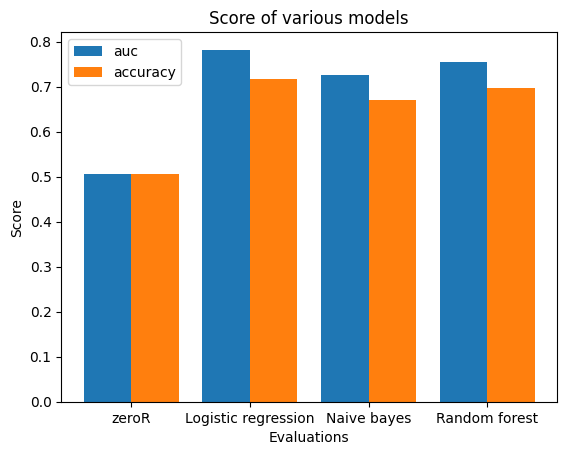

F1:  0.7368076913463296 0.6880306166681911 0.7145859072846075
auc:  [0.5058259081562714, 0.7820716938789599, 0.7256029551719207, 0.7540222521518704]
accuracy:  [0.5058259081562714, 0.7162453514098762, 0.6709998587770089, 0.697735724709316]


In [101]:
emp.pipeline(cohort, "bmi_class_four_sec", tt,0.25, splits=5)

#### Obesity to overweight

In [102]:
cohort = pd.concat([tcohort[(tcohort["bmi_class_four"] == 3) & (tcohort["bmi_class_four_sec"] ==2)],
                    tcohort[(tcohort["bmi_class_four"] == 3) & (tcohort["bmi_class_four_sec"] == 3)].sample(
                        tcohort[(tcohort["bmi_class_four"] == 3) & (tcohort["bmi_class_four_sec"] == 2)].shape[0])])
cohort = cohort[t]

Number of missing values: 
 Waist circumference | Instance 0                               1
Weight | Instance 0                                            0
Body mass index (BMI) | Instance 0                             0
Hip circumference | Instance 0                                 0
Standing height | Instance 0                                   0
Basal metabolic rate | Instance 0                             24
Whole body fat mass | Instance 0                              24
Sleep duration | Instance 0                                    5
MET minutes per week for moderate activity | Instance 0      282
MET minutes per week for vigorous activity | Instance 0      282
MET minutes per week for walking | Instance 0                282
Summed MET minutes per week for all activity | Instance 0    282
Summed days activity | Instance 0                            254
Summed minutes activity | Instance 0                         282
Sex                                                           

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py", line 1238, in f1_score
    return fbeta_score(
  File "c:\users\keimp\appdata\lo

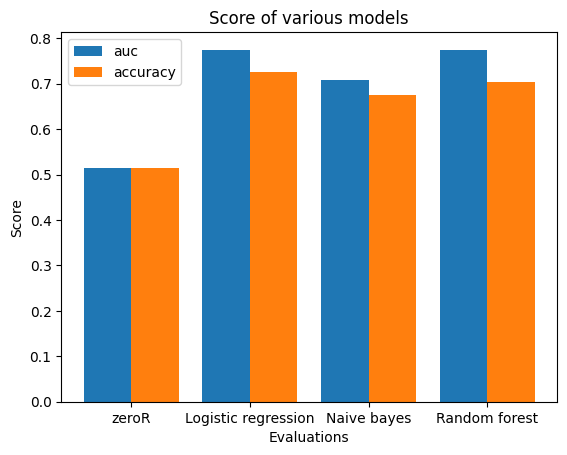

F1:  nan nan nan
auc:  [0.5149948293691831, 0.7749891225224101, 0.7073800253738483, 0.7748738794950188]
accuracy:  [0.5149948293691831, 0.7259654932962982, 0.674258853693713, 0.7042305432402115]


In [103]:
emp.pipeline(cohort, "bmi_class_four_sec", tt,0.25, splits=5)

### Split men and women

#### Healthy to overweight

In [106]:
cohort = pd.concat([tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 2) & (tcohort["Sex"] == 1)],
                    tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 1) & (tcohort["Sex"] == 1)].sample(
                        tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 2) & (tcohort["Sex"] == 1)].shape[0])])
cohort = cohort[t]

Number of missing values: 
 Waist circumference | Instance 0                               0
Weight | Instance 0                                            0
Body mass index (BMI) | Instance 0                             0
Hip circumference | Instance 0                                 0
Standing height | Instance 0                                   0
Basal metabolic rate | Instance 0                             19
Whole body fat mass | Instance 0                              21
Sleep duration | Instance 0                                    3
MET minutes per week for moderate activity | Instance 0      139
MET minutes per week for vigorous activity | Instance 0      139
MET minutes per week for walking | Instance 0                139
Summed MET minutes per week for all activity | Instance 0    139
Summed days activity | Instance 0                            126
Summed minutes activity | Instance 0                         139
Sex                                                           

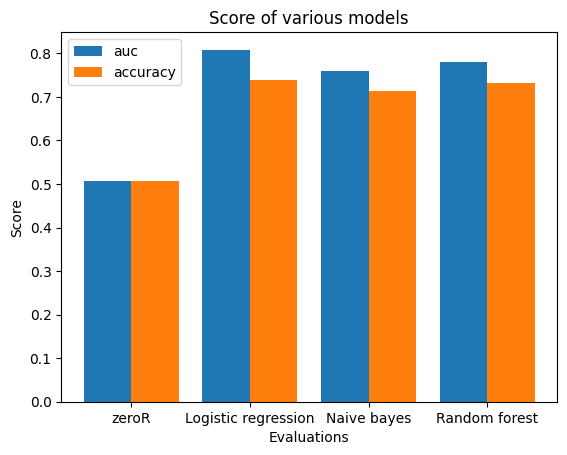

F1:  0.7200690542544015 0.6936670047905201 0.7182151116984776
auc:  [0.5063131313131313, 0.8083678990306978, 0.7598526161940368, 0.7804939022924254]
accuracy:  [0.5063131313131313, 0.739957009792214, 0.7146723986943715, 0.7323700342329432]


In [107]:
emp.pipeline(cohort, "bmi_class_four_sec", tt,0.25, splits=5)

In [108]:
cohort = pd.concat([tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 2) & (tcohort["Sex"] == 0)],
                    tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 1) & (tcohort["Sex"] == 0)].sample(
                        tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 2) & (tcohort["Sex"] == 0)].shape[0])])
cohort = cohort[t]

Number of missing values: 
 Waist circumference | Instance 0                               0
Weight | Instance 0                                            0
Body mass index (BMI) | Instance 0                             0
Hip circumference | Instance 0                                 0
Standing height | Instance 0                                   0
Basal metabolic rate | Instance 0                             27
Whole body fat mass | Instance 0                              27
Sleep duration | Instance 0                                    3
MET minutes per week for moderate activity | Instance 0      268
MET minutes per week for vigorous activity | Instance 0      268
MET minutes per week for walking | Instance 0                268
Summed MET minutes per week for all activity | Instance 0    268
Summed days activity | Instance 0                            235
Summed minutes activity | Instance 0                         268
Sex                                                           

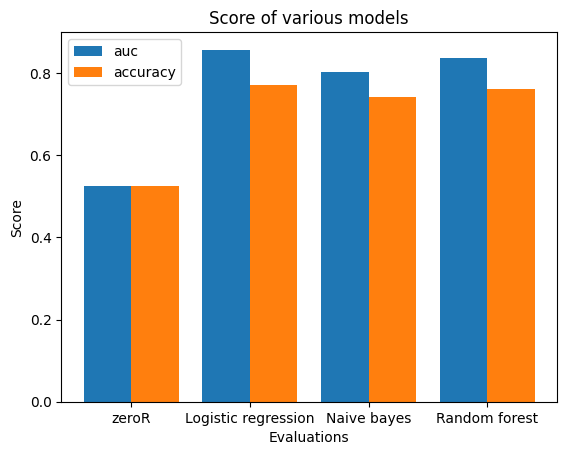

F1:  0.7703122033836729 0.7384370161402345 0.7628592051218174
auc:  [0.5250291036088475, 0.8573696118863238, 0.8041330468521074, 0.8373616281339858]
accuracy:  [0.5250291036088475, 0.7717462260301917, 0.741500067999456, 0.7613151094791242]


In [109]:
emp.pipeline(cohort, "bmi_class_four_sec", tt,0.25, splits=5)

#### Overweight to healthy

In [114]:
cohort = pd.concat([tcohort[(tcohort["bmi_class_four"] == 2) & (tcohort["bmi_class_four_sec"] == 1) & (tcohort["Sex"] == 1)],
                    tcohort[(tcohort["bmi_class_four"] == 2) & (tcohort["bmi_class_four_sec"] == 2) & (tcohort["Sex"] == 1)].sample(
                        tcohort[(tcohort["bmi_class_four"] == 2) & (tcohort["bmi_class_four_sec"] == 1) & (tcohort["Sex"] == 1)].shape[0])])
cohort = cohort[t]

Number of missing values: 
 Waist circumference | Instance 0                               0
Weight | Instance 0                                            0
Body mass index (BMI) | Instance 0                             0
Hip circumference | Instance 0                                 0
Standing height | Instance 0                                   0
Basal metabolic rate | Instance 0                             18
Whole body fat mass | Instance 0                              18
Sleep duration | Instance 0                                    3
MET minutes per week for moderate activity | Instance 0      125
MET minutes per week for vigorous activity | Instance 0      125
MET minutes per week for walking | Instance 0                125
Summed MET minutes per week for all activity | Instance 0    125
Summed days activity | Instance 0                             97
Summed minutes activity | Instance 0                         125
Sex                                                           

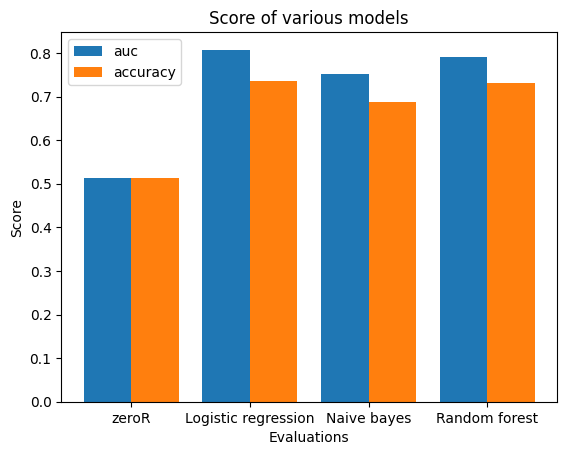

F1:  0.7583054229409736 0.7136634831129945 0.7524642646539692
auc:  [0.5133239831697055, 0.8073885065189412, 0.7506450720268469, 0.7915215513309617]
accuracy:  [0.5133239831697055, 0.7362848419186447, 0.687274697133852, 0.7320791884172165]


In [115]:
emp.pipeline(cohort, "bmi_class_four_sec", tt,0.25, splits=5)

In [119]:
cohort = pd.concat([tcohort[(tcohort["bmi_class_four"] == 2) & (tcohort["bmi_class_four_sec"] == 1) & (tcohort["Sex"] == 0)],
                    tcohort[(tcohort["bmi_class_four"] == 2) & (tcohort["bmi_class_four_sec"] == 2) & (tcohort["Sex"] == 0)].sample(
                        tcohort[(tcohort["bmi_class_four"] == 2) & (tcohort["bmi_class_four_sec"] == 1) & (tcohort["Sex"] == 0)].shape[0])])
cohort = cohort[t]

Number of missing values: 
 Waist circumference | Instance 0                               0
Weight | Instance 0                                            0
Body mass index (BMI) | Instance 0                             0
Hip circumference | Instance 0                                 0
Standing height | Instance 0                                   0
Basal metabolic rate | Instance 0                             14
Whole body fat mass | Instance 0                              14
Sleep duration | Instance 0                                    2
MET minutes per week for moderate activity | Instance 0      211
MET minutes per week for vigorous activity | Instance 0      211
MET minutes per week for walking | Instance 0                211
Summed MET minutes per week for all activity | Instance 0    211
Summed days activity | Instance 0                            179
Summed minutes activity | Instance 0                         211
Sex                                                           

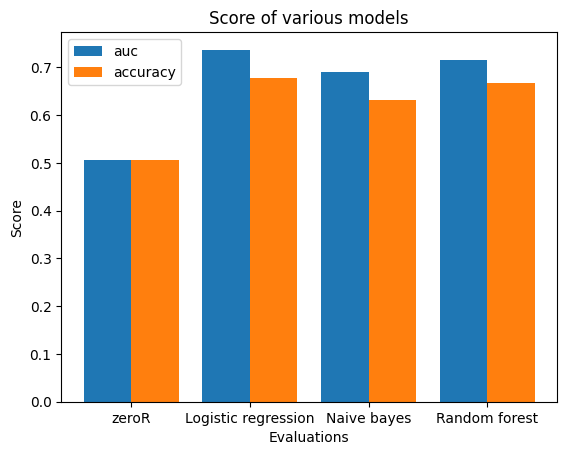

F1:  0.6929892082637856 0.6433011178281649 0.6698185984810189
auc:  [0.506631299734748, 0.7370505625242467, 0.6893885019674493, 0.7160549315549315]
accuracy:  [0.506631299734748, 0.6777748344370861, 0.6326092715231788, 0.6671434878587197]


In [120]:
emp.pipeline(cohort, "bmi_class_four_sec", tt,0.25, splits=5)

## Future scenario's

In [122]:
from sklearn.neighbors import KNeighborsClassifier

#### Healthy to overweight

In [174]:
behaviour = [
            'Sleep duration | Instance 0',
            'Time spent driving | Instance 0',
             'Time spent using computer | Instance 0',
             'Duration of heavy DIY | Instance 0',
             'Duration of light DIY | Instance 0',
             'Duration of moderate activity | Instance 0',
             'Frequency of strenuous sports in last 4 weeks | Instance 0',
            'Duration of other exercises | Instance 0',
            'Duration of vigorous activity | Instance 0'
            ]
behaviour_sec = [
            'Sleep duration | Instance 1',
            'Time spent driving | Instance 1',
             'Time spent using computer | Instance 1',
             'Duration of heavy DIY | Instance 1',
             'Duration of light DIY | Instance 1',
             'Duration of moderate activity | Instance 1',
             'Frequency of strenuous sports in last 4 weeks | Instance 1',
            'Duration of other exercises | Instance 1',
            'Duration of vigorous activity | Instance 1'
            ]
non_behaviour = [
            'Waist circumference | Instance 0',
            'Weight | Instance 0',
            'Body mass index (BMI) | Instance 0',
            'Hip circumference | Instance 0',
            'Standing height | Instance 0',
            'Basal metabolic rate | Instance 0',
            'Whole body fat mass | Instance 0',
            'Sex',
            'Glycated haemoglobin (HbA1c) | Instance 0',
            'Cholesterol | Instance 0',
            "bmi_class_four_sec",
            "bmi_class_four"
           ]
all = behaviour+behaviour_sec
all = all+non_behaviour

In [175]:
tcohort = df[all]

In [176]:
tcohort = tcohort.replace("Prefer not to answer", pd.np.nan)
tcohort = tcohort.replace("Do not know", pd.np.nan)

C:\Users\keimp\AppData\Local\Temp\ipykernel_24244\311919752.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tcohort = tcohort.replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_24244\311919752.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tcohort = tcohort.replace("Do not know", pd.np.nan)


In [177]:
for i in all:
    print(i, tcohort[i].value_counts(), "\n")

Sleep duration | Instance 0 7     192331
8     144265
6      95628
9      29098
5      21922
10      7095
4       4608
12      1167
3        840
11       680
2        181
14       101
13        75
15        49
16        47
1         35
18        13
20         8
19         2
23         1
22         1
17         1
21         1
Name: Sleep duration | Instance 0, dtype: int64 

Time spent driving | Instance 0 Less than an hour a day    153640
1                          140067
0                          106134
2                           60944
3                           14684
4                            6522
5                            3149
6                            2605
8                            1730
9                             882
7                             805
10                            798
12                            249
11                            111
14                             35
15                             25
13                             25
20           

In [178]:
categorical = [
    "Duration of heavy DIY | Instance 0",
    "Duration of light DIY | Instance 0",
    "Frequency of strenuous sports in last 4 weeks | Instance 0",
    "Duration of other exercises | Instance 0",
    "Duration of heavy DIY | Instance 1",
    "Duration of light DIY | Instance 1",
    "Frequency of strenuous sports in last 4 weeks | Instance 1",
    "Duration of other exercises | Instance 1",
]

In [179]:
x=0
for i in categorical:
    one_hot = pd.get_dummies(tcohort[i])
    one_hot.columns = [j+i+"_"+str(x) for j in one_hot.columns]
    tcohort = pd.concat([tcohort, one_hot], axis=1)
    x+=1

In [215]:
all_cat = ['Sleep duration | Instance 0',
 'Time spent driving | Instance 0',
 'Time spent using computer | Instance 0',
 
 'Duration of moderate activity | Instance 0',
 
 
 'Duration of vigorous activity | Instance 0',
 'Sleep duration | Instance 1',
 'Time spent driving | Instance 1',
 'Time spent using computer | Instance 1',
 
 'Duration of moderate activity | Instance 1',

 'Duration of vigorous activity | Instance 1',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Body mass index (BMI) | Instance 0',
 'Hip circumference | Instance 0',
 'Standing height | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Whole body fat mass | Instance 0',
 'Sex',
 'Glycated haemoglobin (HbA1c) | Instance 0',
 'Cholesterol | Instance 0',
 'bmi_class_four_sec',
 'bmi_class_four',
 'Between 1 and 1.5 hoursDuration of heavy DIY | Instance 0_0',
 'Between 1.5 and 2 hoursDuration of heavy DIY | Instance 0_0',
 'Between 15 and 30 minutesDuration of heavy DIY | Instance 0_0',
 'Between 2 and 3 hoursDuration of heavy DIY | Instance 0_0',
 'Between 30 minutes and 1 hourDuration of heavy DIY | Instance 0_0',
 'Less than 15 minutesDuration of heavy DIY | Instance 0_0',
 'Over 3 hoursDuration of heavy DIY | Instance 0_0',
 'Between 1 and 1.5 hoursDuration of light DIY | Instance 0_1',
 'Between 1.5 and 2 hoursDuration of light DIY | Instance 0_1',
 'Between 15 and 30 minutesDuration of light DIY | Instance 0_1',
 'Between 2 and 3 hoursDuration of light DIY | Instance 0_1',
 'Between 30 minutes and 1 hourDuration of light DIY | Instance 0_1',
 'Less than 15 minutesDuration of light DIY | Instance 0_1',
 'Over 3 hoursDuration of light DIY | Instance 0_1',
 '2-3 times a weekFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 '2-3 times in the last 4 weeksFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 '4-5 times a weekFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 'Every dayFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 'Once a weekFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 'Once in the last 4 weeksFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 'Between 1 and 1.5 hoursDuration of other exercises | Instance 0_3',
 'Between 1.5 and 2 hoursDuration of other exercises | Instance 0_3',
 'Between 15 and 30 minutesDuration of other exercises | Instance 0_3',
 'Between 2 and 3 hoursDuration of other exercises | Instance 0_3',
 'Between 30 minutes and 1 hourDuration of other exercises | Instance 0_3',
 'Less than 15 minutesDuration of other exercises | Instance 0_3',
 'Over 3 hoursDuration of other exercises | Instance 0_3',
 'Between 1 and 1.5 hoursDuration of heavy DIY | Instance 1_4',
 'Between 1.5 and 2 hoursDuration of heavy DIY | Instance 1_4',
 'Between 15 and 30 minutesDuration of heavy DIY | Instance 1_4',
 'Between 2 and 3 hoursDuration of heavy DIY | Instance 1_4',
 'Between 30 minutes and 1 hourDuration of heavy DIY | Instance 1_4',
 'Less than 15 minutesDuration of heavy DIY | Instance 1_4',
 'Over 3 hoursDuration of heavy DIY | Instance 1_4',
 'Between 1 and 1.5 hoursDuration of light DIY | Instance 1_5',
 'Between 1.5 and 2 hoursDuration of light DIY | Instance 1_5',
 'Between 15 and 30 minutesDuration of light DIY | Instance 1_5',
 'Between 2 and 3 hoursDuration of light DIY | Instance 1_5',
 'Between 30 minutes and 1 hourDuration of light DIY | Instance 1_5',
 'Less than 15 minutesDuration of light DIY | Instance 1_5',
 'Over 3 hoursDuration of light DIY | Instance 1_5',
 '2-3 times a weekFrequency of strenuous sports in last 4 weeks | Instance 1_6',
 '2-3 times in the last 4 weeksFrequency of strenuous sports in last 4 weeks | Instance 1_6',
 '4-5 times a weekFrequency of strenuous sports in last 4 weeks | Instance 1_6',
 'Every dayFrequency of strenuous sports in last 4 weeks | Instance 1_6',
 'Once a weekFrequency of strenuous sports in last 4 weeks | Instance 1_6',
 'Once in the last 4 weeksFrequency of strenuous sports in last 4 weeks | Instance 1_6',
 'Between 1 and 1.5 hoursDuration of other exercises | Instance 1_7',
 'Between 1.5 and 2 hoursDuration of other exercises | Instance 1_7',
 'Between 15 and 30 minutesDuration of other exercises | Instance 1_7',
 'Between 2 and 3 hoursDuration of other exercises | Instance 1_7',
 'Between 30 minutes and 1 hourDuration of other exercises | Instance 1_7',
 'Less than 15 minutesDuration of other exercises | Instance 1_7',
 'Over 3 hoursDuration of other exercises | Instance 1_7']


In [261]:
all_cat_0 = [
 
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Body mass index (BMI) | Instance 0',
 'Hip circumference | Instance 0',
 'Standing height | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Whole body fat mass | Instance 0',
 'Sex',
 'Glycated haemoglobin (HbA1c) | Instance 0',
 'Cholesterol | Instance 0',
 
 ]

In [187]:
behaviour_cat_0 = ['Sleep duration | Instance 0',
 'Time spent driving | Instance 0',
 'Time spent using computer | Instance 0',
 
 'Duration of moderate activity | Instance 0',
 
 
 'Duration of vigorous activity | Instance 0',
 'Between 1 and 1.5 hoursDuration of heavy DIY | Instance 0_0',
 'Between 1.5 and 2 hoursDuration of heavy DIY | Instance 0_0',
 'Between 15 and 30 minutesDuration of heavy DIY | Instance 0_0',
 'Between 2 and 3 hoursDuration of heavy DIY | Instance 0_0',
 'Between 30 minutes and 1 hourDuration of heavy DIY | Instance 0_0',
 'Less than 15 minutesDuration of heavy DIY | Instance 0_0',
 'Over 3 hoursDuration of heavy DIY | Instance 0_0',
 'Between 1 and 1.5 hoursDuration of light DIY | Instance 0_1',
 'Between 1.5 and 2 hoursDuration of light DIY | Instance 0_1',
 'Between 15 and 30 minutesDuration of light DIY | Instance 0_1',
 'Between 2 and 3 hoursDuration of light DIY | Instance 0_1',
 'Between 30 minutes and 1 hourDuration of light DIY | Instance 0_1',
 'Less than 15 minutesDuration of light DIY | Instance 0_1',
 'Over 3 hoursDuration of light DIY | Instance 0_1',
 '2-3 times a weekFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 '2-3 times in the last 4 weeksFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 '4-5 times a weekFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 'Every dayFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 'Once a weekFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 'Once in the last 4 weeksFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 'Between 1 and 1.5 hoursDuration of other exercises | Instance 0_3',
 'Between 1.5 and 2 hoursDuration of other exercises | Instance 0_3',
 'Between 15 and 30 minutesDuration of other exercises | Instance 0_3',
 'Between 2 and 3 hoursDuration of other exercises | Instance 0_3',
 'Between 30 minutes and 1 hourDuration of other exercises | Instance 0_3',
 'Less than 15 minutesDuration of other exercises | Instance 0_3',
 'Over 3 hoursDuration of other exercises | Instance 0_3',
 ]
behaviour_cat_1 = [
 'Sleep duration | Instance 1',
 'Time spent driving | Instance 1',
 'Time spent using computer | Instance 1',
 
 'Duration of moderate activity | Instance 1',
 
 
 'Duration of vigorous activity | Instance 1',
 'Between 1 and 1.5 hoursDuration of heavy DIY | Instance 1_4',
 'Between 1.5 and 2 hoursDuration of heavy DIY | Instance 1_4',
 'Between 15 and 30 minutesDuration of heavy DIY | Instance 1_4',
 'Between 2 and 3 hoursDuration of heavy DIY | Instance 1_4',
 'Between 30 minutes and 1 hourDuration of heavy DIY | Instance 1_4',
 'Less than 15 minutesDuration of heavy DIY | Instance 1_4',
 'Over 3 hoursDuration of heavy DIY | Instance 1_4',
 'Between 1 and 1.5 hoursDuration of light DIY | Instance 1_5',
 'Between 1.5 and 2 hoursDuration of light DIY | Instance 1_5',
 'Between 15 and 30 minutesDuration of light DIY | Instance 1_5',
 'Between 2 and 3 hoursDuration of light DIY | Instance 1_5',
 'Between 30 minutes and 1 hourDuration of light DIY | Instance 1_5',
 'Less than 15 minutesDuration of light DIY | Instance 1_5',
 'Over 3 hoursDuration of light DIY | Instance 1_5',
 '2-3 times a weekFrequency of strenuous sports in last 4 weeks | Instance 1_6',
 '2-3 times in the last 4 weeksFrequency of strenuous sports in last 4 weeks | Instance 1_6',
 '4-5 times a weekFrequency of strenuous sports in last 4 weeks | Instance 1_6',
 'Every dayFrequency of strenuous sports in last 4 weeks | Instance 1_6',
 'Once a weekFrequency of strenuous sports in last 4 weeks | Instance 1_6',
 'Once in the last 4 weeksFrequency of strenuous sports in last 4 weeks | Instance 1_6',
 'Between 1 and 1.5 hoursDuration of other exercises | Instance 1_7',
 'Between 1.5 and 2 hoursDuration of other exercises | Instance 1_7',
 'Between 15 and 30 minutesDuration of other exercises | Instance 1_7',
 'Between 2 and 3 hoursDuration of other exercises | Instance 1_7',
 'Between 30 minutes and 1 hourDuration of other exercises | Instance 1_7',
 'Less than 15 minutesDuration of other exercises | Instance 1_7',
 'Over 3 hoursDuration of other exercises | Instance 1_7']

In [216]:
cohort = pd.concat([tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 2)],
                    tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 1)].sample(
                        tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 2)].shape[0])])
cohort = cohort[all_cat]

In [217]:
cohort = cohort.replace("Less than an hour a day", 0.5)

In [218]:
cohort.shape

(2270, 76)

In [214]:
for i in cohort.columns.tolist():
    print(i," ", cohort[i].isna().sum())

Sleep duration | Instance 0   10
Time spent driving | Instance 0   25
Time spent using computer | Instance 0   71
Duration of heavy DIY | Instance 0   1231
Duration of light DIY | Instance 0   1041
Duration of moderate activity | Instance 0   511
Frequency of strenuous sports in last 4 weeks | Instance 0   1945
Duration of other exercises | Instance 0   983
Duration of vigorous activity | Instance 0   859
Sleep duration | Instance 1   3
Time spent driving | Instance 1   15
Time spent using computer | Instance 1   9
Duration of heavy DIY | Instance 1   1387
Duration of light DIY | Instance 1   1090
Duration of moderate activity | Instance 1   376
Frequency of strenuous sports in last 4 weeks | Instance 1   1968
Duration of other exercises | Instance 1   1032
Duration of vigorous activity | Instance 1   822
Waist circumference | Instance 0   0
Weight | Instance 0   0
Body mass index (BMI) | Instance 0   0
Hip circumference | Instance 0   0
Standing height | Instance 0   0
Basal metabolic

In [219]:
cohort = cohort.dropna()

In [220]:
cohort.shape

(872, 76)

In [317]:
cohort_b0 = cohort[behaviour_cat_0+["bmi_class_four"]]
cohort_b1 = cohort[behaviour_cat_1+["bmi_class_four_sec"] ]

cohort_b1.columns = behaviour_cat_0+["bmi_class_four_sec"] 

In [318]:
neigh = KNeighborsClassifier(n_neighbors=10)

In [319]:
neigh.fit(cohort_b0[behaviour_cat_0], cohort_b0["bmi_class_four"])

KNeighborsClassifier(n_neighbors=10)

In [320]:
cohort["sec_behaviour"] = neigh.predict(cohort_b1[behaviour_cat_0])

In [321]:
cohort["sec_behaviour"].value_counts()

1.0    864
Name: sec_behaviour, dtype: int64

In [322]:
cohort["bmi_class_four_sec"].value_counts()

1.0    451
2.0    413
Name: bmi_class_four_sec, dtype: int64

In [278]:
cohort[cohort["sec_behaviour"] == cohort["bmi_class_four_sec"]].shape

(433, 77)

In [279]:
cohort[cohort["sec_behaviour"] != cohort["bmi_class_four_sec"]].shape

(439, 77)

In [280]:
cohort["Sex"] = cohort[["Sex"]].apply(dp.sex_to_binary, axis=1)

Number of missing values: 
 Sleep duration | Instance 0                                                0
Time spent driving | Instance 0                                            0
Time spent using computer | Instance 0                                     0
Duration of moderate activity | Instance 0                                 0
Duration of vigorous activity | Instance 0                                 0
                                                                          ..
Between 2 and 3 hoursDuration of other exercises | Instance 1_7            0
Between 30 minutes and 1 hourDuration of other exercises | Instance 1_7    0
Less than 15 minutesDuration of other exercises | Instance 1_7             0
Over 3 hoursDuration of other exercises | Instance 1_7                     0
sec_behaviour                                                              0
Length: 77, dtype: int64
Dataframe dimensions:  (433, 77)


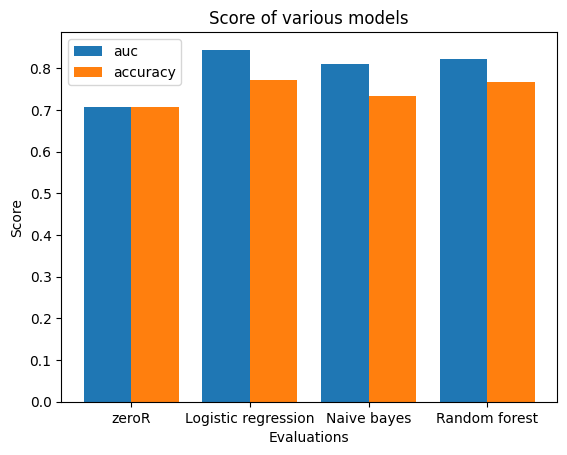

F1:  0.8387970418404098 0.7948910635807562 0.8365416546737788
auc:  [0.7066974595842956, 0.8443945816214457, 0.8099458975714925, 0.8226133506895009]
accuracy:  [0.7066974595842956, 0.7712376369954558, 0.7344827586206897, 0.7666933974873029]


In [281]:
emp.pipeline(cohort[cohort["sec_behaviour"] == cohort["bmi_class_four_sec"]], "bmi_class_four_sec", all_cat_0,0.25, splits=5)

Number of missing values: 
 Sleep duration | Instance 0                                                0
Time spent driving | Instance 0                                            0
Time spent using computer | Instance 0                                     0
Duration of moderate activity | Instance 0                                 0
Duration of vigorous activity | Instance 0                                 0
                                                                          ..
Between 2 and 3 hoursDuration of other exercises | Instance 1_7            0
Between 30 minutes and 1 hourDuration of other exercises | Instance 1_7    0
Less than 15 minutesDuration of other exercises | Instance 1_7             0
Over 3 hoursDuration of other exercises | Instance 1_7                     0
sec_behaviour                                                              0
Length: 77, dtype: int64
Dataframe dimensions:  (439, 77)


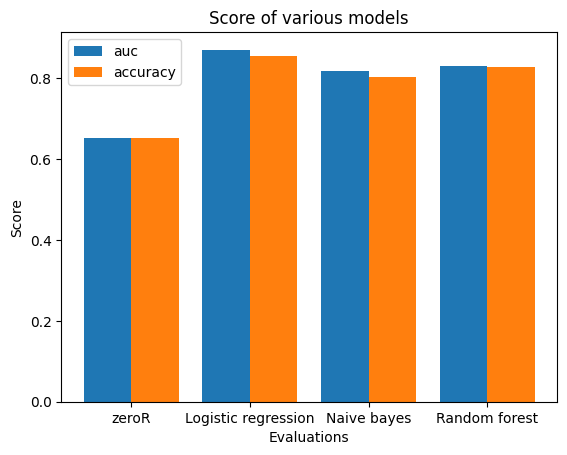

F1:  0.7563811575307522 0.6820304411989488 0.7184766453856292
auc:  [0.6514806378132119, 0.8702829654782117, 0.8175622036180551, 0.8295018831840447]
accuracy:  [0.6514806378132119, 0.8540229885057471, 0.8038401253918496, 0.8267241379310345]


In [282]:
emp.pipeline(cohort[cohort["sec_behaviour"] != cohort["bmi_class_four_sec"]], "bmi_class_four_sec", all_cat_0,0.25, splits=5)

#### Obese to overweight

In [289]:
cohort = pd.concat([tcohort[(tcohort["bmi_class_four"] == 3) & (tcohort["bmi_class_four_sec"] == 2)],
                    tcohort[(tcohort["bmi_class_four"] == 3) & (tcohort["bmi_class_four_sec"] == 3)].sample(
                        tcohort[(tcohort["bmi_class_four"] == 3) & (tcohort["bmi_class_four_sec"] == 2)].shape[0])])
cohort = cohort[all_cat]

In [290]:
cohort = cohort.replace("Less than an hour a day", 0.5)

In [291]:
cohort = cohort.dropna()

In [292]:
cohort.shape

(373, 76)

In [293]:
cohort_b0 = cohort[behaviour_cat_0+["bmi_class_four_sec"]]
cohort_b1 = cohort[behaviour_cat_1+["bmi_class_four_sec"] ]

cohort_b1.columns = behaviour_cat_0+["bmi_class_four_sec"] 

In [294]:
neigh = KNeighborsClassifier(n_neighbors=10)

In [295]:
neigh.fit(cohort_b0[behaviour_cat_0], cohort["bmi_class_four_sec"])

KNeighborsClassifier(n_neighbors=10)

In [296]:
cohort["sec_behaviour"] = neigh.predict(cohort_b1[behaviour_cat_0])

In [297]:
cohort["sec_behaviour"].value_counts()

2.0    237
3.0    136
Name: sec_behaviour, dtype: int64

In [298]:
cohort["bmi_class_four_sec"].value_counts()

2.0    194
3.0    179
Name: bmi_class_four_sec, dtype: int64

In [299]:
cohort["Sex"] = cohort[["Sex"]].apply(dp.sex_to_binary, axis=1)

Number of missing values: 
 Sleep duration | Instance 0                                                0
Time spent driving | Instance 0                                            0
Time spent using computer | Instance 0                                     0
Duration of moderate activity | Instance 0                                 0
Duration of vigorous activity | Instance 0                                 0
                                                                          ..
Between 2 and 3 hoursDuration of other exercises | Instance 1_7            0
Between 30 minutes and 1 hourDuration of other exercises | Instance 1_7    0
Less than 15 minutesDuration of other exercises | Instance 1_7             0
Over 3 hoursDuration of other exercises | Instance 1_7                     0
sec_behaviour                                                              0
Length: 77, dtype: int64
Dataframe dimensions:  (194, 77)


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py", line 1238, in f1_score
    return fbeta_score(
  File "c:\users\keimp\appdata\lo

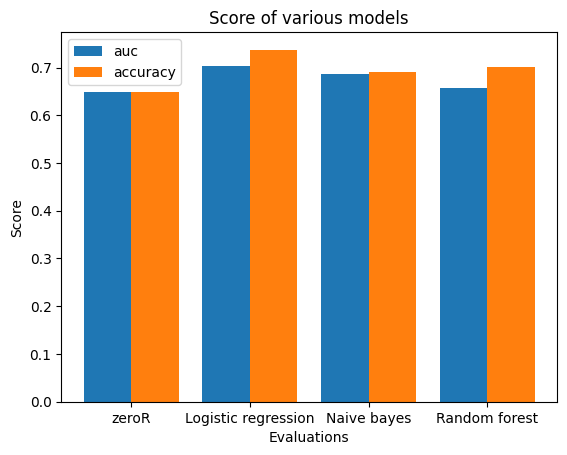

F1:  nan nan nan
auc:  [0.6494845360824743, 0.7035164835164835, 0.6855891800507186, 0.6567590870667794]
accuracy:  [0.6494845360824743, 0.737246963562753, 0.6910931174089069, 0.7012145748987855]


In [300]:
emp.pipeline(cohort[cohort["sec_behaviour"] == cohort["bmi_class_four_sec"]], "bmi_class_four_sec", all_cat_0,0.25, splits=5)

Number of missing values: 
 Sleep duration | Instance 0                                                0
Time spent driving | Instance 0                                            0
Time spent using computer | Instance 0                                     0
Duration of moderate activity | Instance 0                                 0
Duration of vigorous activity | Instance 0                                 0
                                                                          ..
Between 2 and 3 hoursDuration of other exercises | Instance 1_7            0
Between 30 minutes and 1 hourDuration of other exercises | Instance 1_7    0
Less than 15 minutesDuration of other exercises | Instance 1_7             0
Over 3 hoursDuration of other exercises | Instance 1_7                     0
sec_behaviour                                                              0
Length: 77, dtype: int64
Dataframe dimensions:  (179, 77)


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py", line 1238, in f1_score
    return fbeta_score(
  File "c:\users\keimp\appdata\lo

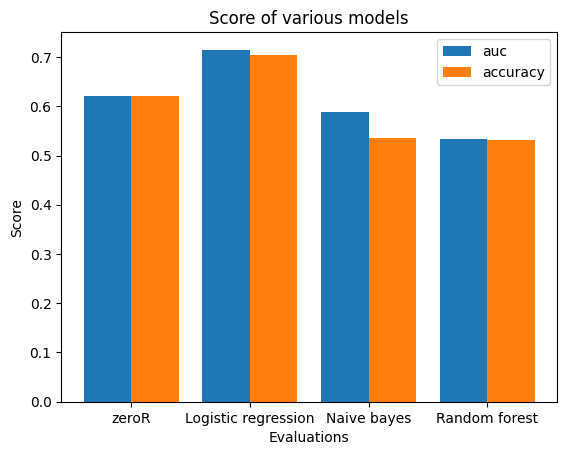

F1:  nan nan nan
auc:  [0.6201117318435754, 0.7148264778699561, 0.5877578942796334, 0.5328226121704382]
accuracy:  [0.6201117318435754, 0.7042857142857143, 0.5363492063492064, 0.5306349206349206]


In [302]:
emp.pipeline(cohort[cohort["sec_behaviour"] != cohort["bmi_class_four_sec"]], "bmi_class_four_sec", all_cat_0,0.25, splits=5)

In [303]:
print(neigh.predict_proba(cohort_b1[behaviour_cat_0]))

[[0.6 0.4]
 [0.4 0.6]
 [0.2 0.8]
 [0.6 0.4]
 [0.5 0.5]
 [0.4 0.6]
 [0.6 0.4]
 [0.6 0.4]
 [0.7 0.3]
 [0.7 0.3]
 [0.6 0.4]
 [0.6 0.4]
 [0.5 0.5]
 [0.5 0.5]
 [0.6 0.4]
 [0.7 0.3]
 [0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [0.3 0.7]
 [0.2 0.8]
 [0.9 0.1]
 [0.6 0.4]
 [0.3 0.7]
 [0.6 0.4]
 [0.3 0.7]
 [0.4 0.6]
 [0.5 0.5]
 [0.4 0.6]
 [0.7 0.3]
 [0.6 0.4]
 [0.3 0.7]
 [0.3 0.7]
 [0.6 0.4]
 [0.4 0.6]
 [0.3 0.7]
 [0.6 0.4]
 [0.7 0.3]
 [0.6 0.4]
 [0.9 0.1]
 [0.6 0.4]
 [0.2 0.8]
 [0.7 0.3]
 [0.8 0.2]
 [0.5 0.5]
 [0.3 0.7]
 [0.3 0.7]
 [0.4 0.6]
 [0.6 0.4]
 [0.3 0.7]
 [0.6 0.4]
 [0.4 0.6]
 [0.4 0.6]
 [0.3 0.7]
 [0.3 0.7]
 [0.5 0.5]
 [0.5 0.5]
 [0.6 0.4]
 [0.2 0.8]
 [0.5 0.5]
 [0.7 0.3]
 [0.5 0.5]
 [0.6 0.4]
 [0.3 0.7]
 [0.7 0.3]
 [0.7 0.3]
 [0.5 0.5]
 [0.7 0.3]
 [0.6 0.4]
 [0.4 0.6]
 [0.6 0.4]
 [0.7 0.3]
 [0.6 0.4]
 [0.5 0.5]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [0.3 0.7]
 [0.6 0.4]
 [0.4 0.6]
 [0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [0.7 0.3]
 [0.7 0.3]
 [0.7 0.3]
 [0.5 0.5]
 [0.2 0.8]
 [0.3 0.7]
 [0.7 0.3]
 [0.3 0.7]

#### Other approach

#### Random forest

In [304]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [306]:
cohort = pd.concat([tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 2)],
                    tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 1)].sample(
                        tcohort[(tcohort["bmi_class_four"] == 1) & (tcohort["bmi_class_four_sec"] == 2)].shape[0])])
cohort = cohort[all_cat]

In [307]:
cohort = cohort.replace("Less than an hour a day", 0.5)

In [308]:
cohort = cohort.dropna()

In [309]:
cohort_b0 = cohort[behaviour_cat_0+["bmi_class_four_sec"]]
cohort_b1 = cohort[behaviour_cat_1+["bmi_class_four_sec"] ]

cohort_b1.columns = behaviour_cat_0+["bmi_class_four_sec"] 

In [310]:
rf.fit(cohort_b0[behaviour_cat_0], cohort["bmi_class_four_sec"])

RandomForestClassifier()

In [311]:
cohort["sec_behaviour"] = rf.predict(cohort_b1[behaviour_cat_0])

In [312]:
cohort["sec_behaviour"].value_counts()

1.0    504
2.0    360
Name: sec_behaviour, dtype: int64

In [313]:
cohort["bmi_class_four_sec"].value_counts()

1.0    451
2.0    413
Name: bmi_class_four_sec, dtype: int64

In [314]:
cohort["Sex"] = cohort[["Sex"]].apply(dp.sex_to_binary, axis=1)

Number of missing values: 
 Sleep duration | Instance 0                                                0
Time spent driving | Instance 0                                            0
Time spent using computer | Instance 0                                     0
Duration of moderate activity | Instance 0                                 0
Duration of vigorous activity | Instance 0                                 0
                                                                          ..
Between 2 and 3 hoursDuration of other exercises | Instance 1_7            0
Between 30 minutes and 1 hourDuration of other exercises | Instance 1_7    0
Less than 15 minutesDuration of other exercises | Instance 1_7             0
Over 3 hoursDuration of other exercises | Instance 1_7                     0
sec_behaviour                                                              0
Length: 77, dtype: int64
Dataframe dimensions:  (459, 77)


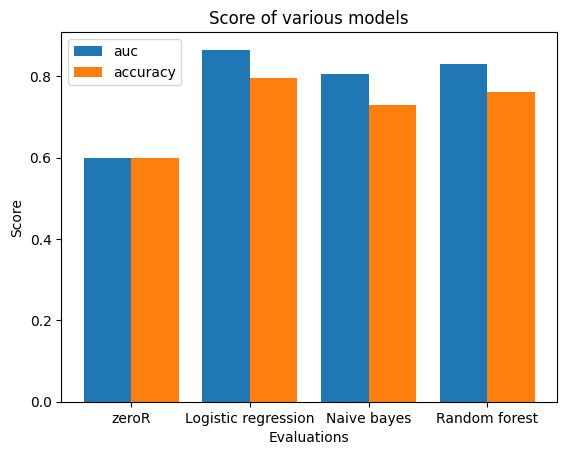

F1:  0.8230944721471037 0.7556612642109539 0.7908427713074031
auc:  [0.599128540305011, 0.8648484848484849, 0.8053153153153153, 0.8301255801255801]
accuracy:  [0.599128540305011, 0.7952938365981844, 0.729933110367893, 0.7604634495938843]


In [315]:
emp.pipeline(cohort[cohort["sec_behaviour"] == cohort["bmi_class_four_sec"]], "bmi_class_four_sec", all_cat_0,0.25, splits=5)

Number of missing values: 
 Sleep duration | Instance 0                                                0
Time spent driving | Instance 0                                            0
Time spent using computer | Instance 0                                     0
Duration of moderate activity | Instance 0                                 0
Duration of vigorous activity | Instance 0                                 0
                                                                          ..
Between 2 and 3 hoursDuration of other exercises | Instance 1_7            0
Between 30 minutes and 1 hourDuration of other exercises | Instance 1_7    0
Less than 15 minutesDuration of other exercises | Instance 1_7             0
Over 3 hoursDuration of other exercises | Instance 1_7                     0
sec_behaviour                                                              0
Length: 77, dtype: int64
Dataframe dimensions:  (405, 77)


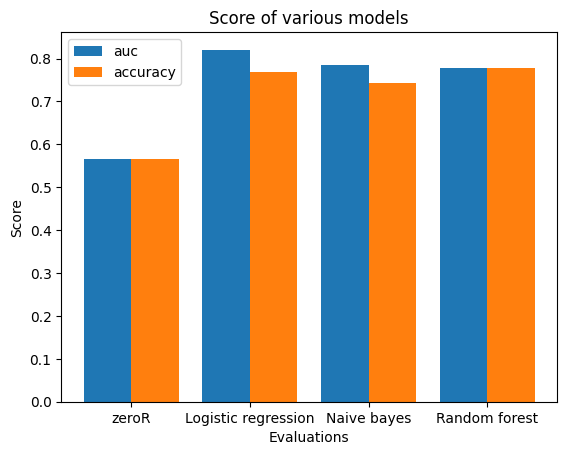

F1:  0.7064803723158881 0.6685819850328191 0.7134798534798534
auc:  [0.5654320987654321, 0.8206203512000614, 0.7860631853385477, 0.7782543516601488]
accuracy:  [0.5654320987654321, 0.7679012345679013, 0.7432098765432099, 0.7777777777777778]


In [316]:
emp.pipeline(cohort[cohort["sec_behaviour"] != cohort["bmi_class_four_sec"]], "bmi_class_four_sec", all_cat_0,0.25, splits=5)

### With zeroth instance based predictions 

In [368]:
tcohort.columns.tolist()

['Sleep duration | Instance 0',
 'Time spent driving | Instance 0',
 'Time spent using computer | Instance 0',
 'Duration of heavy DIY | Instance 0',
 'Duration of light DIY | Instance 0',
 'Duration of moderate activity | Instance 0',
 'Frequency of strenuous sports in last 4 weeks | Instance 0',
 'Duration of other exercises | Instance 0',
 'Duration of vigorous activity | Instance 0',
 'Sleep duration | Instance 1',
 'Time spent driving | Instance 1',
 'Time spent using computer | Instance 1',
 'Duration of heavy DIY | Instance 1',
 'Duration of light DIY | Instance 1',
 'Duration of moderate activity | Instance 1',
 'Frequency of strenuous sports in last 4 weeks | Instance 1',
 'Duration of other exercises | Instance 1',
 'Duration of vigorous activity | Instance 1',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Body mass index (BMI) | Instance 0',
 'Hip circumference | Instance 0',
 'Standing height | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Whole body

In [329]:
cohort_healthy = tcohort[(tcohort["bmi_class_four"] == 1)]
cohort_overweight = tcohort[(tcohort["bmi_class_four"] == 2)]
cohort_obese = tcohort[(tcohort["bmi_class_four"] == 3)]
                                    
cohort_healthy = cohort_healthy[all_cat].dropna()
cohort_overweight = cohort_overweight[all_cat].dropna()
cohort_obese = cohort_obese[all_cat].dropna()

In [331]:
cohort_healthy = cohort_healthy.replace("Less than an hour a day", 0.5)
cohort_overweight = cohort_overweight.replace("Less than an hour a day", 0.5)
cohort_obese = cohort_obese.replace("Less than an hour a day", 0.5)

In [332]:
cohort = pd.concat([cohort_healthy,cohort_overweight,cohort_obese])

In [348]:
cohort.shape

(6975, 77)

In [390]:
cohort_b0 = cohort[behaviour_cat_0+["bmi_class_four_sec"]]
cohort_b1 = cohort[behaviour_cat_1+["bmi_class_four_sec"] ]

cohort_b1.columns = behaviour_cat_0+["bmi_class_four_sec"] 

In [391]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(cohort_b0[behaviour_cat_0])


MinMaxScaler()

In [392]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(mms.transform(cohort_b0[behaviour_cat_0]), cohort_b0["bmi_class_four_sec"])

KNeighborsClassifier(n_neighbors=10)

In [393]:
cohort["sec_behaviour"] = neigh.predict(mms.transform(cohort_b1[behaviour_cat_0]))

In [357]:
rf = RandomForestClassifier()
rf.fit(cohort_b0[behaviour_cat_0], cohort["bmi_class_four"])

RandomForestClassifier()

In [358]:
cohort["sec_behaviour"] = rf.predict(cohort_b1[behaviour_cat_0])

In [359]:
cohort["sec_behaviour"].value_counts()

2.0    3508
1.0    3226
3.0     241
Name: sec_behaviour, dtype: int64

In [360]:
cohort["bmi_class_four_sec"].value_counts()

2.0    3034
1.0    2871
3.0    1055
0.0      15
Name: bmi_class_four_sec, dtype: int64

In [361]:
a = cohort[(cohort["sec_behaviour"] ==1) & (cohort["bmi_class_four"] ==1)]
a["bmi_class_four_sec"].value_counts()

1.0    1243
2.0     202
0.0       5
Name: bmi_class_four_sec, dtype: int64

In [362]:
cohort[(cohort["sec_behaviour"] ==1) & (cohort["bmi_class_four"] ==2)].shape

(1354, 77)

In [339]:
cohort["Sex"] = cohort[["Sex"]].apply(dp.sex_to_binary, axis=1)

Number of missing values: 
 Sleep duration | Instance 0                                                0
Time spent driving | Instance 0                                            0
Time spent using computer | Instance 0                                     0
Duration of moderate activity | Instance 0                                 0
Duration of vigorous activity | Instance 0                                 0
                                                                          ..
Between 2 and 3 hoursDuration of other exercises | Instance 1_7            0
Between 30 minutes and 1 hourDuration of other exercises | Instance 1_7    0
Less than 15 minutesDuration of other exercises | Instance 1_7             0
Over 3 hoursDuration of other exercises | Instance 1_7                     0
sec_behaviour                                                              0
Length: 77, dtype: int64
Dataframe dimensions:  (664, 77)


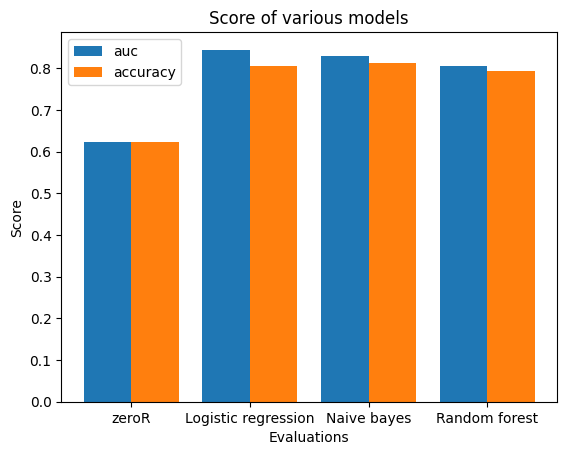

F1:  0.6996977171989386 0.7037786949325276 0.7068642156264885
auc:  [0.6219879518072289, 0.8441797318398414, 0.8302483564098575, 0.8061826819473014]
accuracy:  [0.6219879518072289, 0.8042492595124174, 0.8132832080200502, 0.7936773752563226]


In [404]:
emp.pipeline(pd.concat([ cohort[ (cohort["bmi_class_four"] ==1) & (cohort["bmi_class_four_sec"] ==1)].sample(251) ,
             cohort[ (cohort["bmi_class_four"] ==1) & (cohort["bmi_class_four_sec"] ==2)] ]), 
"bmi_class_four_sec", ['Body mass index (BMI) | Instance 0',"Weight | Instance 0","sec_behaviour"],0.25, splits=5)

Number of missing values: 
 Sleep duration | Instance 0                                                0
Time spent driving | Instance 0                                            0
Time spent using computer | Instance 0                                     0
Duration of moderate activity | Instance 0                                 0
Duration of vigorous activity | Instance 0                                 0
                                                                          ..
Between 2 and 3 hoursDuration of other exercises | Instance 1_7            0
Between 30 minutes and 1 hourDuration of other exercises | Instance 1_7    0
Less than 15 minutesDuration of other exercises | Instance 1_7             0
Over 3 hoursDuration of other exercises | Instance 1_7                     0
sec_behaviour                                                              0
Length: 77, dtype: int64
Dataframe dimensions:  (826, 77)


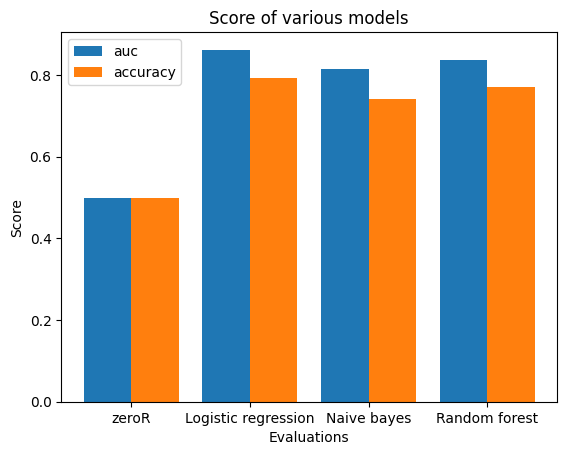

F1:  0.7797289510150291 0.7236102933683579 0.7546900576962989
auc:  [0.5, 0.8618646198074698, 0.8154562416577861, 0.8376452032048264]
accuracy:  [0.5, 0.7929828404527199, 0.7421394669587441, 0.7712011683096021]


In [395]:
emp.pipeline(pd.concat([ cohort[(cohort["bmi_class_four"] ==1) & (cohort["bmi_class_four_sec"] ==2)] ,
             cohort[(cohort["bmi_class_four"] ==1) & (cohort["bmi_class_four_sec"] ==1)].sample(
                 cohort[ (cohort["bmi_class_four"] ==1) & (cohort["bmi_class_four_sec"] ==2)].shape[0]
             ) ]), 
"bmi_class_four_sec", all_cat_0+["sec_behaviour"],0.25, splits=5)

Number of missing values: 
 Sleep duration | Instance 0                                                0
Time spent driving | Instance 0                                            0
Time spent using computer | Instance 0                                     0
Duration of moderate activity | Instance 0                                 0
Duration of vigorous activity | Instance 0                                 0
                                                                          ..
Between 2 and 3 hoursDuration of other exercises | Instance 1_7            0
Between 30 minutes and 1 hourDuration of other exercises | Instance 1_7    0
Less than 15 minutesDuration of other exercises | Instance 1_7             0
Over 3 hoursDuration of other exercises | Instance 1_7                     0
sec_behaviour                                                              0
Length: 77, dtype: int64
Dataframe dimensions:  (456, 77)


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py", line 1238, in f1_score
    return fbeta_score(
  File "c:\users\keimp\appdata\lo

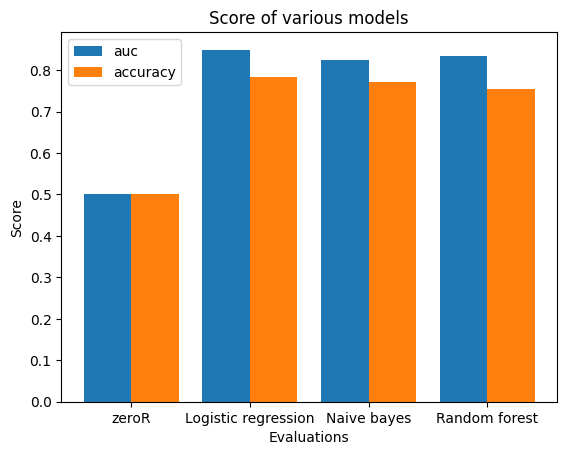

F1:  nan nan nan
auc:  [0.5, 0.8490065112371351, 0.824282713715606, 0.83342049989498]
accuracy:  [0.5, 0.7828714763497372, 0.7718824653607262, 0.7543478260869565]


In [396]:
emp.pipeline(pd.concat([ cohort[(cohort["bmi_class_four"] ==2) & (cohort["bmi_class_four_sec"] ==3)] ,
             cohort[(cohort["bmi_class_four"] ==2) & (cohort["bmi_class_four_sec"] ==2)].sample(
                 cohort[ (cohort["bmi_class_four"] ==2) & (cohort["bmi_class_four_sec"] ==3)].shape[0]
             ) ]), 
"bmi_class_four_sec", all_cat_0+["sec_behaviour"],0.25, splits=5)

In [397]:
emp.pipeline(pd.concat([ cohort[(cohort["bmi_class_four"] ==2) & (cohort["bmi_class_four_sec"] ==2)] ,
             cohort[(cohort["bmi_class_four"] ==2) & (cohort["bmi_class_four_sec"] ==1)].sample(
                 cohort[ (cohort["bmi_class_four"] ==1) & (cohort["bmi_class_four_sec"] ==2)].shape[0]
             ) ]), 
"bmi_class_four_sec", all_cat_0+["sec_behaviour"],0.25, splits=5)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [168]:
for i in cohort.columns.tolist():
    print(i, cohort[i].value_counts(), "\n")

Sleep duration | Instance 0 7     967
8     690
6     393
9     114
5      63
10     19
4      10
12      3
3       2
13      1
Name: Sleep duration | Instance 0, dtype: int64 

Time spent driving | Instance 0 Less than an hour a day    911
1                          675
2                          285
0                          272
3                           54
4                           27
5                            7
6                            5
8                            3
14                           2
9                            1
7                            1
11                           1
12                           1
10                           1
Name: Time spent driving | Instance 0, dtype: int64 

Time spent using computer | Instance 0 1                          722
Less than an hour a day    593
0                          440
2                          249
3                           85
4                           40
5                           23
6              

In [83]:
for i in t:
    print(i,tcohort[i].value_counts())

Waist circumference | Instance 0 92.0     14675
88.0     14571
89.0     14200
90.0     14194
94.0     13925
         ...  
119.8        1
65.7         1
62.2         1
133.4        1
50.0         1
Name: Waist circumference | Instance 0, Length: 738, dtype: int64
Weight | Instance 0 75.0     1527
74.0     1466
70.0     1445
76.0     1437
72.0     1416
         ... 
177.9       1
155.9       1
175.7       1
188.1       1
168.8       1
Name: Weight | Instance 0, Length: 1380, dtype: int64
Body mass index (BMI) | Instance 0 27.7778    235
24.6914    187
24.4646    151
24.6152    148
24.1690    145
          ... 
23.3882      1
27.7097      1
25.1923      1
26.1347      1
22.4731      1
Name: Body mass index (BMI) | Instance 0, Length: 46964, dtype: int64
Hip circumference | Instance 0 100.0    26314
102.0    26208
101.0    25742
104.0    24634
103.0    24601
         ...  
81.8         1
178.0        1
195.0        1
134.1        1
84.9         1
Name: Hip circumference | Instance 0, Leng

In [141]:
df['Frequency of strenuous sports in last 4 weeks | Instance 0'].value_counts()

2-3 times a week                 19652
Once a week                      11422
4-5 times a week                  7407
2-3 times in the last 4 weeks     7394
Once in the last 4 weeks          2540
Every day                         1081
Do not know                        495
Prefer not to answer                63
Name: Frequency of strenuous sports in last 4 weeks | Instance 0, dtype: int64

!! BMI accounts for almost all predictive value

In [138]:
df.columns.tolist()

['Participant ID',
 'Waist circumference | Instance 0',
 'Waist circumference | Instance 1',
 'Waist circumference | Instance 2',
 'Waist circumference | Instance 3',
 'Weight | Instance 0',
 'Weight | Instance 1',
 'Weight | Instance 2',
 'Weight | Instance 3',
 'Body mass index (BMI) | Instance 0',
 'Body mass index (BMI) | Instance 1',
 'Body mass index (BMI) | Instance 2',
 'Body mass index (BMI) | Instance 3',
 'Hip circumference | Instance 0',
 'Hip circumference | Instance 1',
 'Hip circumference | Instance 2',
 'Hip circumference | Instance 3',
 'Standing height | Instance 0',
 'Standing height | Instance 1',
 'Standing height | Instance 2',
 'Standing height | Instance 3',
 'Whole body fat mass | Instance 0',
 'Whole body fat mass | Instance 1',
 'Whole body fat mass | Instance 2',
 'Whole body fat mass | Instance 3',
 'Body fat percentage | Instance 0',
 'Body fat percentage | Instance 1',
 'Body fat percentage | Instance 2',
 'Body fat percentage | Instance 3',
 'Basal metab

In [405]:
ggg = pd.read_csv(wd + "NHS/Data_files/Grouped_files/replace/Dates_attending_assessment_centers_participant.csv")

In [410]:
for i in ggg.columns.tolist():
    print( ggg[i][:50].dropna())

0     1078283
1     5170903
2     5723318
3     2903197
4     5732491
5     3023357
6     5237786
7     3505197
8     2810841
9     3451693
10    2518545
11    3716712
12    4066442
13    4788222
14    2669893
15    1992726
16    1273022
17    2803741
18    1359739
19    1319888
20    2820587
21    1702527
22    4251207
23    3060923
24    2294381
25    3652920
26    3960500
27    1066874
28    4804571
29    2272835
30    5403530
31    5187043
32    5742906
33    2240007
34    2140963
35    2805014
36    2252765
37    5003751
38    5827234
39    3102471
40    2538956
41    2880742
42    3232491
43    5041470
44    5020549
45    3727743
46    5278945
47    2123613
48    5142176
49    4164151
Name: Participant ID, dtype: int64
0     2007-12-18
1     2008-01-07
2     2008-04-04
3     2010-07-16
4     2009-10-03
5     2009-11-20
6     2008-07-31
7     2010-07-02
8     2008-09-27
9     2008-08-22
10    2008-11-28
11    2010-06-04
12    2009-06-18
13    2008-04-29
14    2007-12-06
15    2010

## Repeat analysis on second instance

#### Adding more variables

In [411]:
df.shape

(502364, 255)

In [413]:
df = df.merge(dp.pre_blood_pressure(), on= "Participant ID")
df = df.merge(dp.pre_alcohol(), on="Participant ID")
df = df.merge(dp.pre_smoking(), on="Participant ID")

In [427]:
df["bmi_class_four_t"] = df['Body mass index (BMI) | Instance 2'].apply(four_class_bmi, 1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_24244\1116326326.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [428]:
df.shape

(502364, 269)

In [429]:
behaviour = [
            'Sleep duration | Instance 0',
            'Time spent driving | Instance 0',
             'Time spent using computer | Instance 0',
             'Duration of heavy DIY | Instance 0',
             'Duration of light DIY | Instance 0',
             'Duration of moderate activity | Instance 0',
             'Frequency of strenuous sports in last 4 weeks | Instance 0',
            'Duration of other exercises | Instance 0',
            'Duration of vigorous activity | Instance 0'
            ]
behaviour_sec = [
            'Sleep duration | Instance 2',
            'Time spent driving | Instance 2',
             'Time spent using computer | Instance 2',
             'Duration of heavy DIY | Instance 2',
             'Duration of light DIY | Instance 2',
             'Duration of moderate activity | Instance 2',
             'Frequency of strenuous sports in last 4 weeks | Instance 2',
            'Duration of other exercises | Instance 2',
            'Duration of vigorous activity | Instance 2'
            ]
non_behaviour = [
            'Waist circumference | Instance 0',
            'Weight | Instance 0',
            'Body mass index (BMI) | Instance 0',
            'Hip circumference | Instance 0',
            'Standing height | Instance 0',
            'Basal metabolic rate | Instance 0',
            'Whole body fat mass | Instance 0',
            'Sex',
            'Glycated haemoglobin (HbA1c) | Instance 0',
            'Cholesterol | Instance 0',
            "bmi_class_four_t",
            "bmi_class_four"
           ]
all = behaviour+behaviour_sec
all = all+non_behaviour

In [430]:
tcohort = df[all]

In [431]:
tcohort = tcohort.replace("Prefer not to answer", pd.np.nan)
tcohort = tcohort.replace("Do not know", pd.np.nan)

C:\Users\keimp\AppData\Local\Temp\ipykernel_24244\311919752.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tcohort = tcohort.replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_24244\311919752.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tcohort = tcohort.replace("Do not know", pd.np.nan)


In [432]:
categorical = [
    "Duration of heavy DIY | Instance 0",
    "Duration of light DIY | Instance 0",
    "Frequency of strenuous sports in last 4 weeks | Instance 0",
    "Duration of other exercises | Instance 0",
    "Duration of heavy DIY | Instance 2",
    "Duration of light DIY | Instance 2",
    "Frequency of strenuous sports in last 4 weeks | Instance 2",
    "Duration of other exercises | Instance 2",
]

In [433]:
x=0
for i in categorical:
    one_hot = pd.get_dummies(tcohort[i])
    one_hot.columns = [j+i+"_"+str(x) for j in one_hot.columns]
    tcohort = pd.concat([tcohort, one_hot], axis=1)
    x+=1

In [435]:
all_cat = ['Sleep duration | Instance 0',
 'Time spent driving | Instance 0',
 'Time spent using computer | Instance 0',

 'Duration of moderate activity | Instance 0',

 'Duration of vigorous activity | Instance 0',
 'Sleep duration | Instance 2',
 'Time spent driving | Instance 2',
 'Time spent using computer | Instance 2',
 
 'Duration of moderate activity | Instance 2',
 
 'Duration of vigorous activity | Instance 2',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Body mass index (BMI) | Instance 0',
 'Hip circumference | Instance 0',
 'Standing height | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Whole body fat mass | Instance 0',
 'Sex',
 'Glycated haemoglobin (HbA1c) | Instance 0',
 'Cholesterol | Instance 0',
 'bmi_class_four_t',
 'bmi_class_four',
 'Between 1 and 1.5 hoursDuration of heavy DIY | Instance 0_0',
 'Between 1.5 and 2 hoursDuration of heavy DIY | Instance 0_0',
 'Between 15 and 30 minutesDuration of heavy DIY | Instance 0_0',
 'Between 2 and 3 hoursDuration of heavy DIY | Instance 0_0',
 'Between 30 minutes and 1 hourDuration of heavy DIY | Instance 0_0',
 'Less than 15 minutesDuration of heavy DIY | Instance 0_0',
 'Over 3 hoursDuration of heavy DIY | Instance 0_0',
 'Between 1 and 1.5 hoursDuration of light DIY | Instance 0_1',
 'Between 1.5 and 2 hoursDuration of light DIY | Instance 0_1',
 'Between 15 and 30 minutesDuration of light DIY | Instance 0_1',
 'Between 2 and 3 hoursDuration of light DIY | Instance 0_1',
 'Between 30 minutes and 1 hourDuration of light DIY | Instance 0_1',
 'Less than 15 minutesDuration of light DIY | Instance 0_1',
 'Over 3 hoursDuration of light DIY | Instance 0_1',
 '2-3 times a weekFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 '2-3 times in the last 4 weeksFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 '4-5 times a weekFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 'Every dayFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 'Once a weekFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 'Once in the last 4 weeksFrequency of strenuous sports in last 4 weeks | Instance 0_2',
 'Between 1 and 1.5 hoursDuration of other exercises | Instance 0_3',
 'Between 1.5 and 2 hoursDuration of other exercises | Instance 0_3',
 'Between 15 and 30 minutesDuration of other exercises | Instance 0_3',
 'Between 2 and 3 hoursDuration of other exercises | Instance 0_3',
 'Between 30 minutes and 1 hourDuration of other exercises | Instance 0_3',
 'Less than 15 minutesDuration of other exercises | Instance 0_3',
 'Over 3 hoursDuration of other exercises | Instance 0_3',
 'Between 1 and 1.5 hoursDuration of heavy DIY | Instance 2_4',
 'Between 1.5 and 2 hoursDuration of heavy DIY | Instance 2_4',
 'Between 15 and 30 minutesDuration of heavy DIY | Instance 2_4',
 'Between 2 and 3 hoursDuration of heavy DIY | Instance 2_4',
 'Between 30 minutes and 1 hourDuration of heavy DIY | Instance 2_4',
 'Less than 15 minutesDuration of heavy DIY | Instance 2_4',
 'Over 3 hoursDuration of heavy DIY | Instance 2_4',
 'Between 1 and 1.5 hoursDuration of light DIY | Instance 2_5',
 'Between 1.5 and 2 hoursDuration of light DIY | Instance 2_5',
 'Between 15 and 30 minutesDuration of light DIY | Instance 2_5',
 'Between 2 and 3 hoursDuration of light DIY | Instance 2_5',
 'Between 30 minutes and 1 hourDuration of light DIY | Instance 2_5',
 'Less than 15 minutesDuration of light DIY | Instance 2_5',
 'Over 3 hoursDuration of light DIY | Instance 2_5',
 '2-3 times a weekFrequency of strenuous sports in last 4 weeks | Instance 2_6',
 '2-3 times in the last 4 weeksFrequency of strenuous sports in last 4 weeks | Instance 2_6',
 '4-5 times a weekFrequency of strenuous sports in last 4 weeks | Instance 2_6',
 'Every dayFrequency of strenuous sports in last 4 weeks | Instance 2_6',
 'Once a weekFrequency of strenuous sports in last 4 weeks | Instance 2_6',
 'Once in the last 4 weeksFrequency of strenuous sports in last 4 weeks | Instance 2_6',
 'Between 1 and 1.5 hoursDuration of other exercises | Instance 2_7',
 'Between 1.5 and 2 hoursDuration of other exercises | Instance 2_7',
 'Between 15 and 30 minutesDuration of other exercises | Instance 2_7',
 'Between 2 and 3 hoursDuration of other exercises | Instance 2_7',
 'Between 30 minutes and 1 hourDuration of other exercises | Instance 2_7',
 'Less than 15 minutesDuration of other exercises | Instance 2_7',
 'Over 3 hoursDuration of other exercises | Instance 2_7']


In [460]:
datacolumns_selected = [
                        'Waist circumference | Instance 0',
                        'Weight | Instance 0',
                        'Body mass index (BMI) | Instance 0',
                        'Hip circumference | Instance 0',
                        'Standing height | Instance 0',
                        'Basal metabolic rate | Instance 0',
                        'Whole body fat mass | Instance 0'
                       ]
datacolumns_selected_lab = [
                        'Waist circumference | Instance 0',
                        'Weight | Instance 0',
                        'Body mass index (BMI) | Instance 0',
                        'Hip circumference | Instance 0',
                        'Standing height | Instance 0',
                        'Basal metabolic rate | Instance 0',
                        'Whole body fat mass | Instance 0',
                        'Glycated haemoglobin (HbA1c) | Instance 0',
                        "bmi_class_four_t",
                        "bmi_class_four"
                       ]

In [461]:
 df[(df["bmi_class_four"] == 1) & (df["bmi_class_four_t"] == 2)].shape

(3929, 269)

In [462]:
cohort = pd.concat([ df[(df["bmi_class_four"] == 2) & (df["bmi_class_four_t"] == 3)],
                    df[(df["bmi_class_four"] == 2) & (df["bmi_class_four_t"] == 2)].sample(
                    df[(df["bmi_class_four"] == 2) & (df["bmi_class_four_t"] == 3)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

Number of missing values: 
 Waist circumference | Instance 0               0
Weight | Instance 0                            0
Body mass index (BMI) | Instance 0             0
Hip circumference | Instance 0                 0
Standing height | Instance 0                   0
Basal metabolic rate | Instance 0             73
Whole body fat mass | Instance 0              72
Glycated haemoglobin (HbA1c) | Instance 0    451
bmi_class_four_t                               0
bmi_class_four                                 0
dtype: int64
Dataframe dimensions:  (5671, 10)


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py", line 1238, in f1_score
    return fbeta_score(
  File "c:\users\keimp\appdata\lo

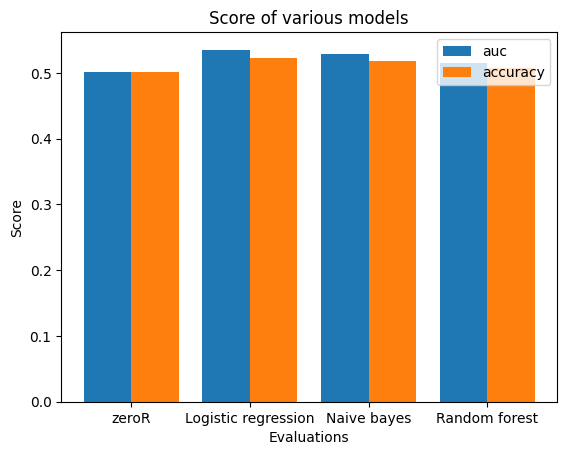

F1:  nan nan nan
auc:  [0.5018515253041792, 0.5350825759516761, 0.5281344981035103, 0.5141748486805611]
accuracy:  [0.5018515253041792, 0.5224856070671049, 0.5171924263260533, 0.5080250798312472]


In [463]:
emp.pipeline(cohort, "bmi_class_four_t", ["Glycated haemoglobin (HbA1c) | Instance 0"],0.25, splits=5)

Bmi fails to capture body transformation